In [5]:
import numpy as np
from make_galaxies import SimulateRandomDwarfElliptical,simulate_HSC
import make_galaxies
from astropy.convolution import convolve_fft
from inspect_galaxies import inspect, inspectall, inspectsum

In [6]:
# Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
sim = SimulateRandomDwarfElliptical(dmax=15.,MF_min=1.e5,MF_max=1.e6)
sim.pick_galaxy()
print("mass: ",np.log10(sim.mass))
print("distance: ",sim.distance)
print("re_kpc, arcsec: ",sim.re_kpc, sim.re_arcsec)
print("[Fe/H]: ",sim.feh)
print("age: ",sim.age)
print("ellip: ",sim.ellipticity)
print("pa: ",sim.position_angle)

mass:  5.997872790960577
distance:  12.13848876296229
re_kpc, arcsec:  0.20636702112532654 3.5259397382606332
[Fe/H]:  -1.75
age:  12.110831639732176
ellip:  0.3633367426497872
pa:  1.081850347823929


In [8]:
sim.renormalize_isochrone()
sim.compute_smooth_flux()
sim.create_smooth_portion()
#sim.create_stochastic_portion()
#sim.sum_componentsim.simulate_HSCimage() 

Peak smooth cts/s in g band: 0.006152634125425962
Peak smooth cts/s in r band: 0.007242025988306734
Peak smooth cts/s in i band: 0.007463584815405913
Peak smooth cts/s in z band: 0.006446680549095306
Peak smooth cts/s in y band: 0.007152485103579948


In [9]:
sim.create_stochastic_portion()

Total cluster mass is 692185 (limit was 692184)
Peak number of stars in a pixel:  26
Pixel row,col of peak:  (634, 641)
239271 stars added to 98155 pixels


In [10]:
sim.sum_components()

In [11]:
sim.simulate_HSCimage() 

62.5 62.5 18.158746051831052 1.9
62.5 62.5 16.313814402420068 1.9
62.5 62.5 13.010901617650823 1.9
62.5 62.5 14.834318514601346 1.9
62.5 62.5 13.458075129844197 1.9


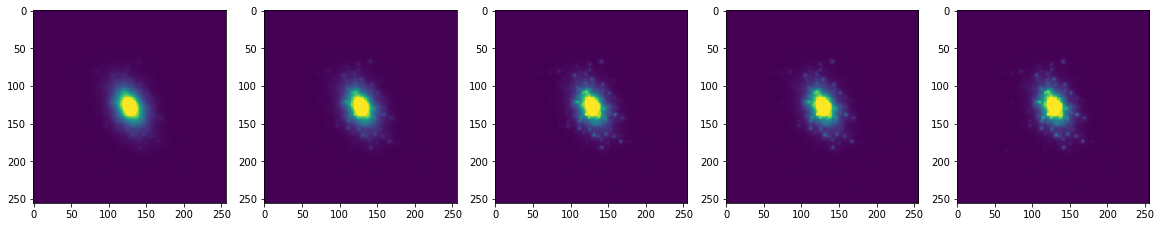

In [12]:
inspectall(sim,sim.noiseless_image)

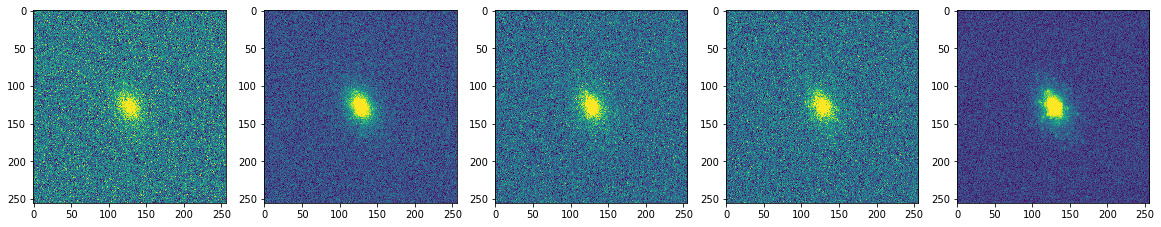

In [13]:
inspectall(sim,sim.HSCimage)

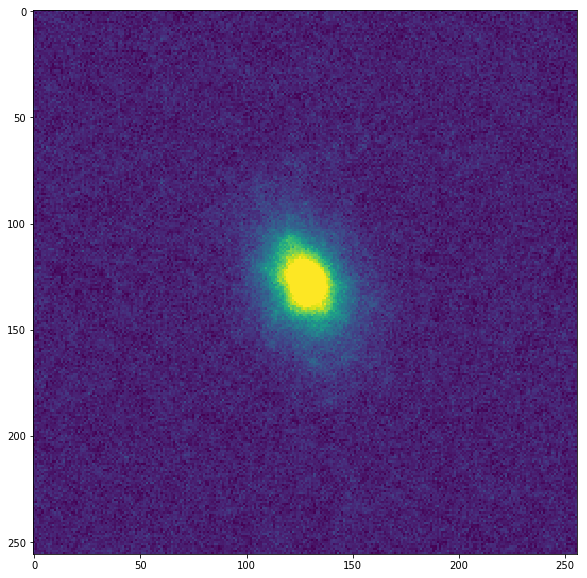

In [14]:
img=inspectsum(sim,convolved=True)
plt.figure(figsize=(10,10))
inspect(img)

In [15]:
sim.isofile

'MIST_v1.2_vvcrit0.4_HSC/MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.4_HSC.iso.cmd'

In [17]:
sim.HSCimage['g'].shape

(256, 256)

In [22]:
sim.poisson_model.shape

(1280, 1280)